# Decision Tree Regressor implementation step-by-step

## Step 1: Importing Required Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Mean Squared Error (MSE) Function

#### The MSE function is used to evaluate how well the split has performed. The closer the MSE is to 0, the better the split (as the data points in each group are closer to their average).

In [11]:
# Mean Squared Error (MSE) function
def mse(y):
    return np.mean((y - np.mean(y)) ** 2)

### Explanation:

#### y is the array of target values (e.g., prices).
#### np.mean(y) gives the average of all target values.
#### The difference between each target value and the average is squared, and then we take the mean of those squared differences. This is the MSE.

## Step 3: Splitting the Data
#### The split_data function splits the data based on a feature and threshold.

In [15]:
# Split data based on a threshold
def split_data(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold  # True for data where feature value is <= threshold
    right_mask = ~left_mask  # True for data where feature value is > threshold
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

### Explanation:

#### X[:, feature_index] accesses the values of the specified feature (column).
#### We create a mask (True/False) for data points where the feature values are less than or equal to the threshold (left_mask), and the rest goes to the right side (right_mask).
#### X[left_mask] selects all the data points that match the left condition, and similarly for the right data points.

## Step 4: Finding the Best Split

#### The best_split function finds the best feature and threshold to split the data based on the Mean Squared Error (MSE).

In [19]:
# Find the best split for the data
def best_split(X, y):
    best_mse = float("inf")  # Start with a large MSE
    best_feature = None
    best_threshold = None
    best_left_X, best_left_y, best_right_X, best_right_y = None, None, None, None
    
    for feature_index in range(X.shape[1]):  # Loop through each feature
        thresholds = np.unique(X[:, feature_index])  # Get all unique values in the feature
        
        for threshold in thresholds:  # Try each unique value as a threshold
            left_X, left_y, right_X, right_y = split_data(X, y, feature_index, threshold)
            
            mse_left = mse(left_y)  # Calculate MSE for the left side
            mse_right = mse(right_y)  # Calculate MSE for the right side
            
            mse_split = (len(left_y) / len(y)) * mse_left + (len(right_y) / len(y)) * mse_right  # Weighted average MSE
            
            if mse_split < best_mse:  # If this split is better (lower MSE), update the best split
                best_mse = mse_split
                best_feature = feature_index
                best_threshold = threshold
                best_left_X, best_left_y, best_right_X, best_right_y = left_X, left_y, right_X, right_y
    
    return best_feature, best_threshold, best_left_X, best_left_y, best_right_X, best_right_y

### Explanation:

#### We loop through each feature and try all unique values in that feature as possible threshold values.
#### For each threshold, we split the data and calculate the MSE for the left and right subsets.
#### We calculate the weighted average of the MSE for both subsets. The goal is to minimize this MSE.
#### If a split results in a lower MSE than the previous best, we update the best split.

## Step 5: Building the Tree

#### Now we define the DecisionTreeRegressor class to handle the tree-building process.

In [23]:
# Decision Tree Regressor class
class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth  # Max depth of the tree
        self.tree = None  # This will hold the decision tree
    
    def build_tree(self, X, y, depth=0):
        # If max depth is reached or all data points are the same, return the mean of y
        if len(set(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return np.mean(y)
        
        feature, threshold, left_X, left_y, right_X, right_y = best_split(X, y)
        
        if feature is None:  # If no valid split found, return the mean of y
            return np.mean(y)
        
        # Recursively build the left and right branches
        left_tree = self.build_tree(left_X, left_y, depth + 1)
        right_tree = self.build_tree(right_X, right_y, depth + 1)
        
        return {
            'feature': feature,
            'threshold': threshold,
            'left': left_tree,
            'right': right_tree
        }

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)  # Train the tree by building it

    def predict_single(self, x, tree):
        if isinstance(tree, dict):  # If this is a decision node
            if x[tree['feature']] <= tree['threshold']:
                return self.predict_single(x, tree['left'])  # Go left
            else:
                return self.predict_single(x, tree['right'])  # Go right
        else:  # If this is a leaf node, return the predicted value
            return tree

    def predict(self, X):
        return np.array([self.predict_single(x, self.tree) for x in X])  # Predict for each sample

### Explanation:

#### build_tree:

####     This is the recursive function that builds the decision tree. It stops if the data is homogeneous (all target values are the same) or if the maximum depth is reached.
####     If the data can be split, it calls best_split to find the best feature and threshold. It then builds the left and right subtrees recursively.
####     When the recursion reaches a leaf node (a stop condition), it returns the mean of the target values in that subset.

#### fit:

####     This method trains the model by calling build_tree.

#### predict_single:

####     This method predicts the target value for a single sample by traversing the tree. It checks if the sample's feature value is less than or greater than the threshold and moves to the left or right accordingly until it reaches a leaf node.

#### predict:

####     This method applies predict_single to every sample in the input data and returns the predictions.

## Step 6: Example Usage

#### Now, we create a small dataset and use our DecisionTreeRegressor to fit the model and make predictions:

In [59]:
# Sample dataset: features (Mileage, Year) and target (Price)
X = np.array([0.5, 1.1, 1.6, 2.2, 2.8, 3.3, 3.7, 3.9, 4.5, 4.9, 5.3, 5.8, 6.5, 6.9, 7.4, 7.8]).reshape(-1,1)
y = np.array([2.3, 2.4, 2.3, 2.4, 2.3, 0.5, 0.6, 0.49, 3.4, 3.5, 3.4, 3.4, 2.7, 2.9, 2.8, 3])

# Instantiate and train the decision tree model
model = DecisionTreeRegressor(max_depth=3)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)

Predictions: [2.3        2.35       2.35       2.35       2.35       0.55
 0.55       0.49       3.45       3.45       3.4        3.4
 3.53333333 3.53333333 3.53333333 3.4       ]


C:\Users\Zakaria\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Zakaria\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Explanation:

#### We create a small dataset X (with features such as Mileage and Year) and y (target values like Price).
#### We instantiate the DecisionTreeRegressor class with a maximum depth of 3 (max_depth=3), fit the model to the data, and then make predictions for the same dataset.

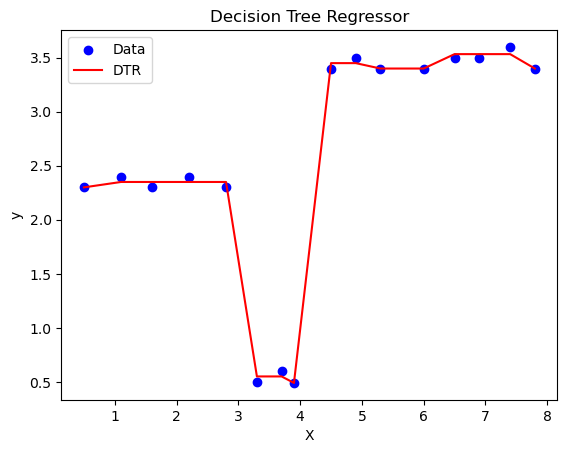

In [65]:

# Plot regression line
plt.scatter(X, y, color='blue', label="Data")  # Scatter plot for the data
plt.plot(X, predictions, color='red', label="DTR")  # Regression line

# Set labels for the axes
plt.xlabel("X")
plt.ylabel("y")

# Add a legend
plt.legend()

# Add title
plt.title("Decision Tree Regressor")

# Show the plot
plt.show()